In [1]:
# SECCIÓN 1: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.data.loader import DataLoader
from src.data.preprocessor import DataCleaner


In [2]:

# SECCIÓN 2: Cargar Datos
loader = DataLoader()
df = loader.load_data("data/raw/Consolidado PQRS 25-03-2015.xlsx")
print(f"Dataset cargado: {df.shape}")

# SECCIÓN 3: Validar
is_valid, errors = loader.validate_data()
if is_valid:
    print("✓ Datos válidos")
else:
    print(f"✗ Errores: {errors}")

# SECCIÓN 4: Exploración
summary = loader.get_summary_statistics()
print(summary)


Dataset cargado: (182, 37)
✓ Datos válidos
                                  Column  Non-Null  Null  Null %  \
0                                 SEMANA       182     0    0.0%   
1                               PQRS No.       182     0    0.0%   
2                          GESTOR SOCIAL       182     0    0.0%   
3                                  FECHA       182     0    0.0%   
4                              SUBREGION       182     0    0.0%   
5                              MUNICIPIO       182     0    0.0%   
6                                    VIA       165    17    9.3%   
7                            TIPO DE VIA       175     7    3.8%   
8   NOMBRE PERSONA QUE INTERPONE LA PQRS       182     0    0.0%   
9                         IDENTIFICACION       165    17    9.3%   
10                        TIPOS DE HECHO       181     1    0.5%   
11                 DESCRIPCION DEL HECHO       182     0    0.0%   
12                   ENTIDAD RESPONSABLE       182     0    0.0%   
13   

In [3]:

# SECCIÓN 5: Análisis Exploratorio
eda = {
    "Total PQRS": len(df),
    "Entidades": df["ENTIDAD RESPONSABLE"].value_counts().to_dict(),
    "Tipos de Hecho": df["TIPOS DE HECHO"].value_counts().to_dict(),
    "Estados": df["ESTADO"].value_counts().to_dict(),
}

print("\n=== ANÁLISIS EXPLORATORIO ===")
for key, value in eda.items():
    print(f"\n{key}:")
    print(value)




=== ANÁLISIS EXPLORATORIO ===

Total PQRS:
182

Entidades:
{'SIF': 109, 'Contratista': 57, 'Municipio': 6, 'Interventor': 3, 'Otra': 2, 'DAPARD': 2, 'Secretaria de Gobierno': 2, 'Otra (ADMINISTRACION MUNICIPAL DE ARBOLETES, COMUNIDAD Y GOBERNACION DE ANTIOQUIA)': 1}

Tipos de Hecho:
{'Ingeniería de la obra': 82, 'Movilidad': 40, 'Seguridad': 25, 'Económico': 15, 'Social': 8, 'Ambiental': 5, 'Político': 3, 'Predial': 2, 'Servicios públicos': 1}

Estados:
{'Resuelto': 118, 'En Trámite': 35, 'En trámite': 27, 'Por iniciar': 2}


/tmp/ipykernel_127403/2719611619.py:20: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


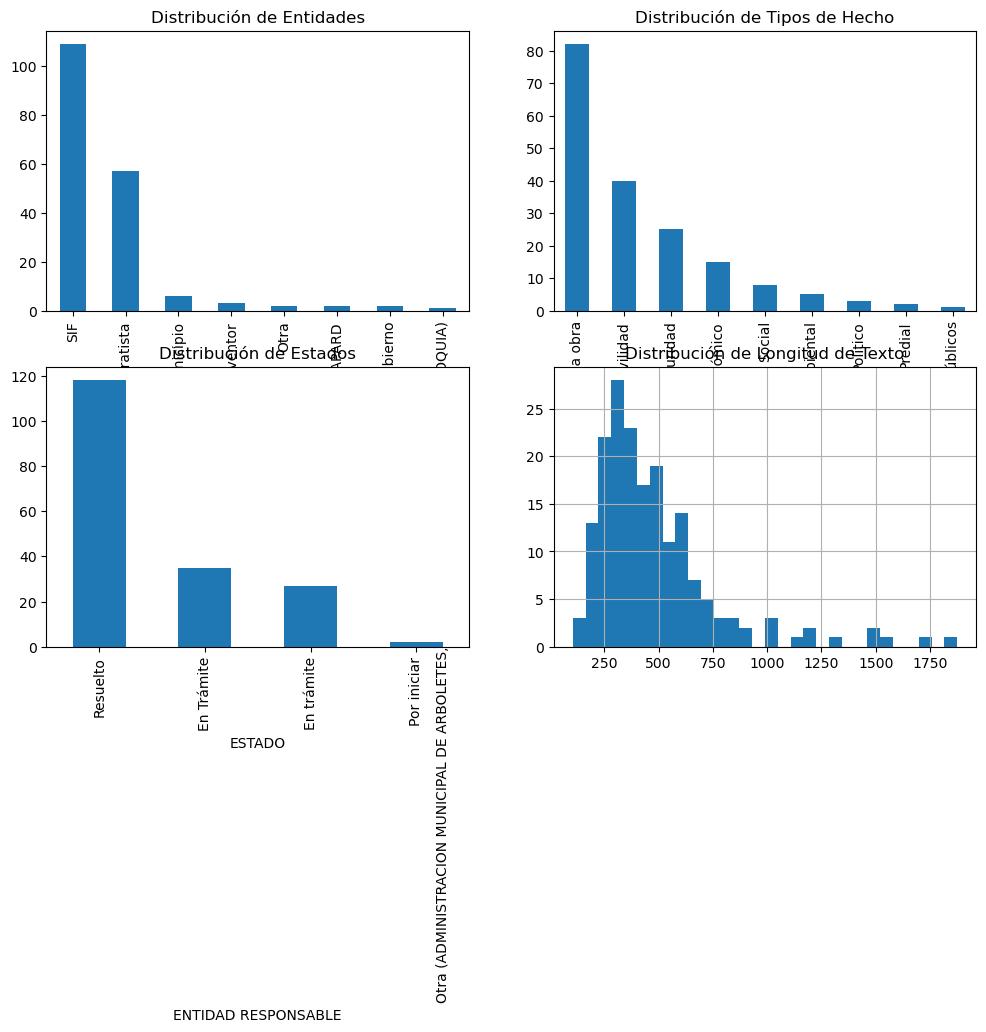

In [4]:
# SECCIÓN 6: Visualizaciones
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Entidades
df["ENTIDAD RESPONSABLE"].value_counts().plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title("Distribución de Entidades")

# Tipos
df["TIPOS DE HECHO"].value_counts().plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title("Distribución de Tipos de Hecho")

# Estados
df["ESTADO"].value_counts().plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title("Distribución de Estados")

# Longitud texto
df["DESCRIPCION DEL HECHO"].str.len().hist(ax=axes[1, 1], bins=30)
axes[1, 1].set_title("Distribución de Longitud de Texto")

plt.tight_layout()
plt.show()


In [6]:

# SECCIÓN 7: Limpiar Datos
cleaner = DataCleaner()
df_clean = cleaner.clean_dataframe(df)
print(f"\n✓ Datos limpios: {df_clean.shape}")

# SECCIÓN 8: Extraer Features
df_features = cleaner.extract_features(df_clean)
print(f"Features extraidas: {df_features.columns.tolist()}")



✓ Datos limpios: (181, 38)
Features extraidas: ['SEMANA', 'PQRS No.', 'GESTOR SOCIAL', 'FECHA', 'SUBREGION', 'MUNICIPIO', 'VIA', 'TIPO DE VIA', 'NOMBRE PERSONA QUE INTERPONE LA PQRS', 'IDENTIFICACION', 'TIPOS DE HECHO', 'DESCRIPCION DEL HECHO', 'ENTIDAD RESPONSABLE', 'CUAL ENTIDAD', 'ESTADO', 'ESTADO DEL APLICATIVO', 'DIFIEREN??', 'REMITIDA POR LA SIF A:', 'FECHA INICIO TRÁMITE', 'ULTIMA FECHA DE TRÁMITE', 'ULTIMA FECHA DE TRÁMITE APLICATIVO', 'TRÁMITE APLICATIVO', 'RESPUESTA 2014', 'RESPUESTA 06/02/2015', 'RESPUESTA 10/02/2015', 'RESPUESTA 17/02/2015', 'RESPUESTA 24/02/2015', 'RESPUESTA 03/03/2015', 'RESPUESTA 10/03/2015', 'RESPUESTA 17/03/2016', 'RESPUESTA 24/03/2017', 'FECHA DE LA RESPUESTA', 'FECHA DE CIERRE (SI ES RESUELTA)', 'SEMAFORO DE TRAMITE', datetime.datetime(2015, 3, 24, 0, 0), 'MERCURIO', 'Unnamed: 36', 'DESCRIPCION_LIMPIA', 'text_length', 'word_count', 'is_critical', 'has_safety_issue', 'has_damage', 'is_incomplete']


In [8]:
# SECCIÓN 9: Guardar
df_clean.to_csv("data/processed/pqrs_clean.csv", index=False)
print("✓ Datos guardados en data/processed/pqrs_clean.csv")

✓ Datos guardados en data/processed/pqrs_clean.csv
